<a href="https://colab.research.google.com/github/202201522/IT462_Assignment1/blob/main/Group_24_missingno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1: missingno**
Please explain the missingno package and use its functionalities on your dataset.

**Group no.** - **24**

**Members** - Arnold Mochahari (202201522), Rushali Shah (202411061), Vandhana Mahajan (202421008)

**Date** - 17.09.2024

Google colab link: https://colab.research.google.com/drive/1BdZCyV2HALBP6t20JqcF9L3UuPrSjM_s?usp=drive_link

# **Missing Data Model**
A missing data model is a conceptual framework or approach that defines how and why data is missing in a dataset. Understanding the nature and mechanism of missing data is critical because it can affect the validity of any analysis or model built using the data. There are three main types of missing data mechanisms:

**MCAR (Missing Completely at Random):**

Data is missing completely independently of both observed and unobserved data. The likelihood of missingness is the same for all observations. Example: A survey respondent accidentally skips a question.

**MAR (Missing at Random):**

The missingness depends on observed data but not on the missing values themselves. Example: Older participants in a survey are more likely to skip questions about income, but within each age group, the missingness is random.

**MNAR (Missing Not at Random):**

The missingness depends on unobserved data or the values that are missing. Example: Patients with more severe conditions are less likely to report certain symptoms, leading to missing values that are correlated with the severity of the condition.

Correctly identifying the missing data mechanism helps in choosing the appropriate imputation methods and determining the impact of missing data on analysis results.

## **missingno Package**
The missingno package in Python provides a simple and flexible toolset for visualizing missing data within a dataset. By generating clear and concise visualizations, missingno helps us understand the structure of missing values in our data. It also helps identify patterns in missing data, which can guide your decision-making process regarding imputation or removal of missing values.

# **Key Functionalities of the missingno Package**

1. **missingno.matrix(df):**
Provides a data matrix visualization of missing values.
Shows the distribution and positions of missing values in the dataset.
Allows you to quickly identify which columns have missing data and how much is missing.

2. **missingno.bar(df):**
Creates a bar chart that shows the percentage of missing data in each column.
Helpful for quickly assessing how much data is missing from each variable.

3. **missingno.heatmap(df):**
Visualizes the correlation of missingness between columns.
Shows relationships between missing data in different columns to detect patterns.
The heatmap highlights variables that might have a strong correlation in terms of missing values.

4. **missingno.dendrogram(df):**
Generates a dendrogram showing hierarchical clustering of columns based on their missing value structure.
Helps identify groups of columns with similar missing data patterns.


# **Installing missingno library**

In [ ]:
pip install missingno

# **Importing libraries and dataset**

In [ ]:
import seaborn as sns
import missingno as msno
import pandas as pd

# Set visualisation style
sns.set(style="whitegrid")

# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# **Data inspection**

In [ ]:
df.head()
# method that returns a specified number of rows, string from the top.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()
# method that prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# A quick statistical view
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Check for total missing values in columns
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


We can see using the info method that there are missing values in the 'age', 'embarked', 'deck' and 'embark_town' columns.

In [ ]:
# Check for missing percentages in columns
df_mis_pcent=100*df.isnull().sum()/len(df)
print('\n\nMissing percentage:\n\n', df_mis_pcent)



Missing percentage:

 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64




```
# This is formatted as code
```

#  Visualizing Missing Data using different finctionalities of missingno

<Axes: >

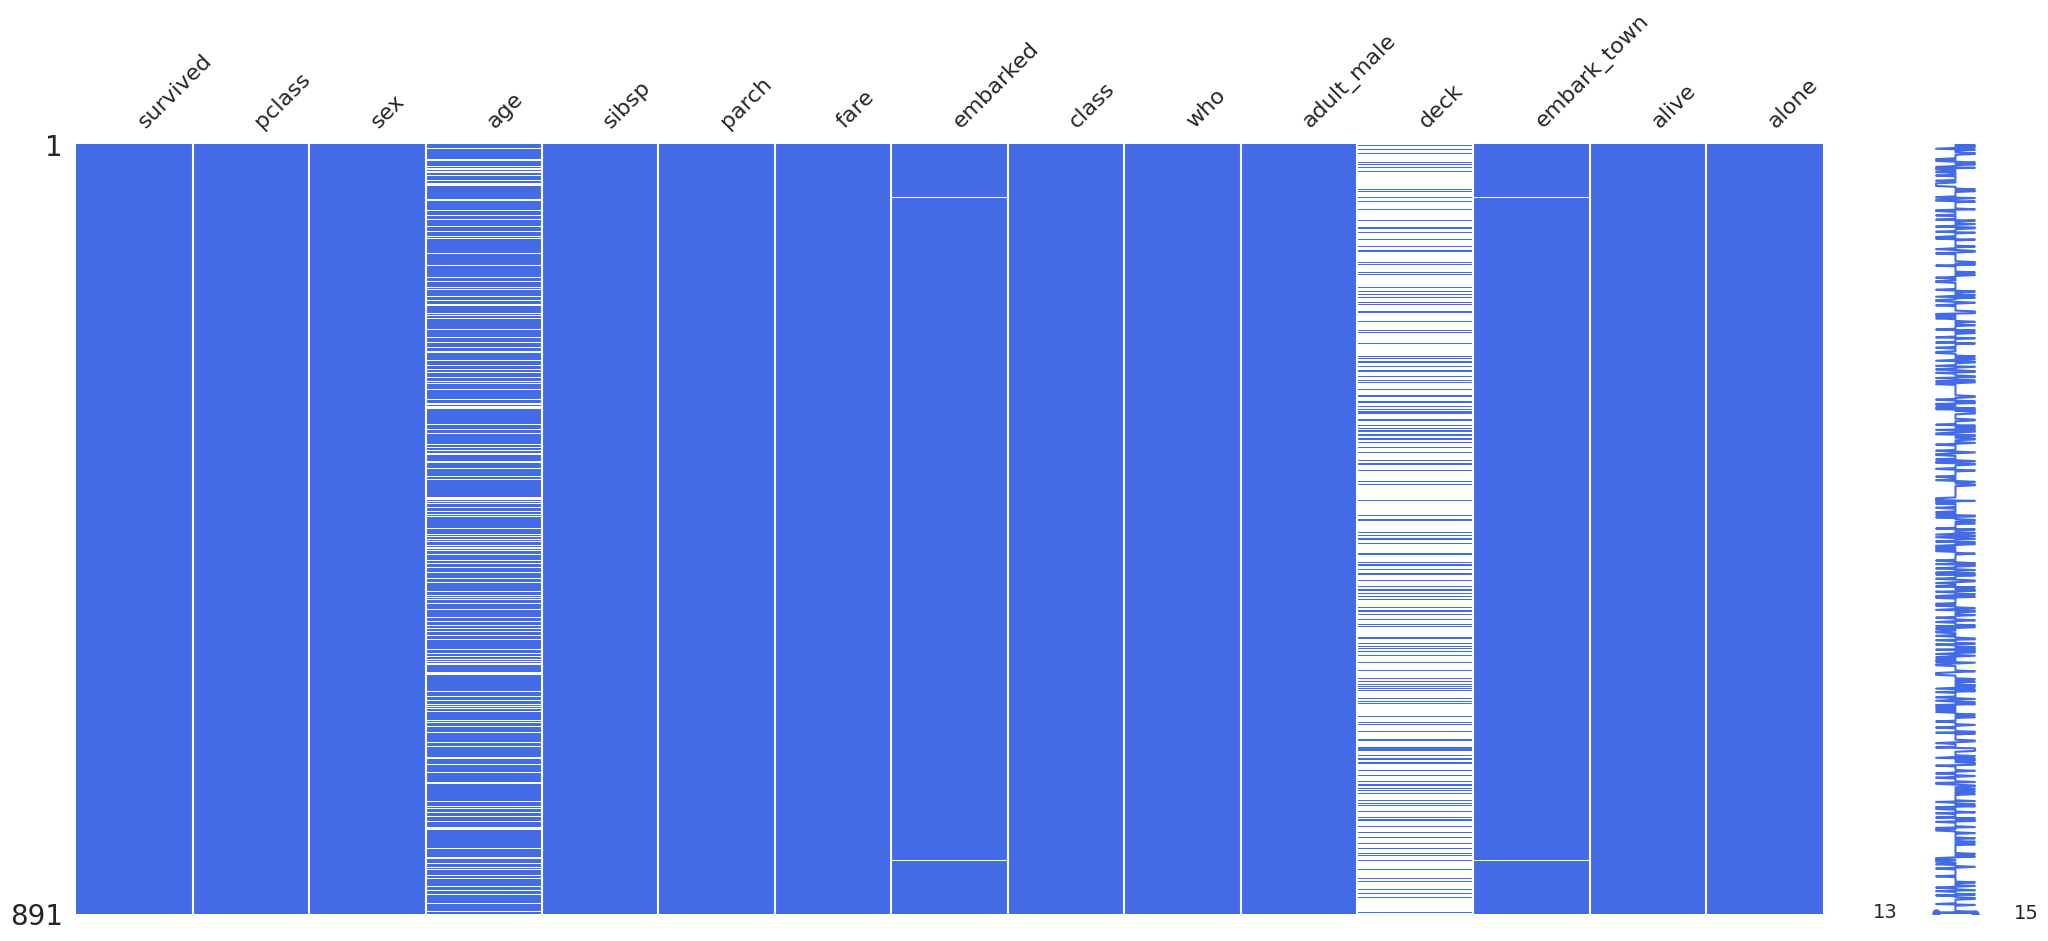

In [ ]:
# Visualize missing data using a matrix plot
msno.matrix(df, color= (65/250, 105/250, 225/250)) #color rgb

This plot shows each row of the dataset as a horizontal line and highlights missing data points as white lines.

The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities. When a row has a value in each column, the line will be at the maximum right position. As missing values start to increase within that row the line will move towards the left.

The total number of columns in a given dataset, at the bottom.

It is especially useful for identifying patterns in missing data over the rows.

The matrix plot shows that **the deck column has a substantial amount of missing data, followed by missing data in age column and almost same amount of missing data in embark and embark_town have a moderate amount of missing data**.

<Axes: >

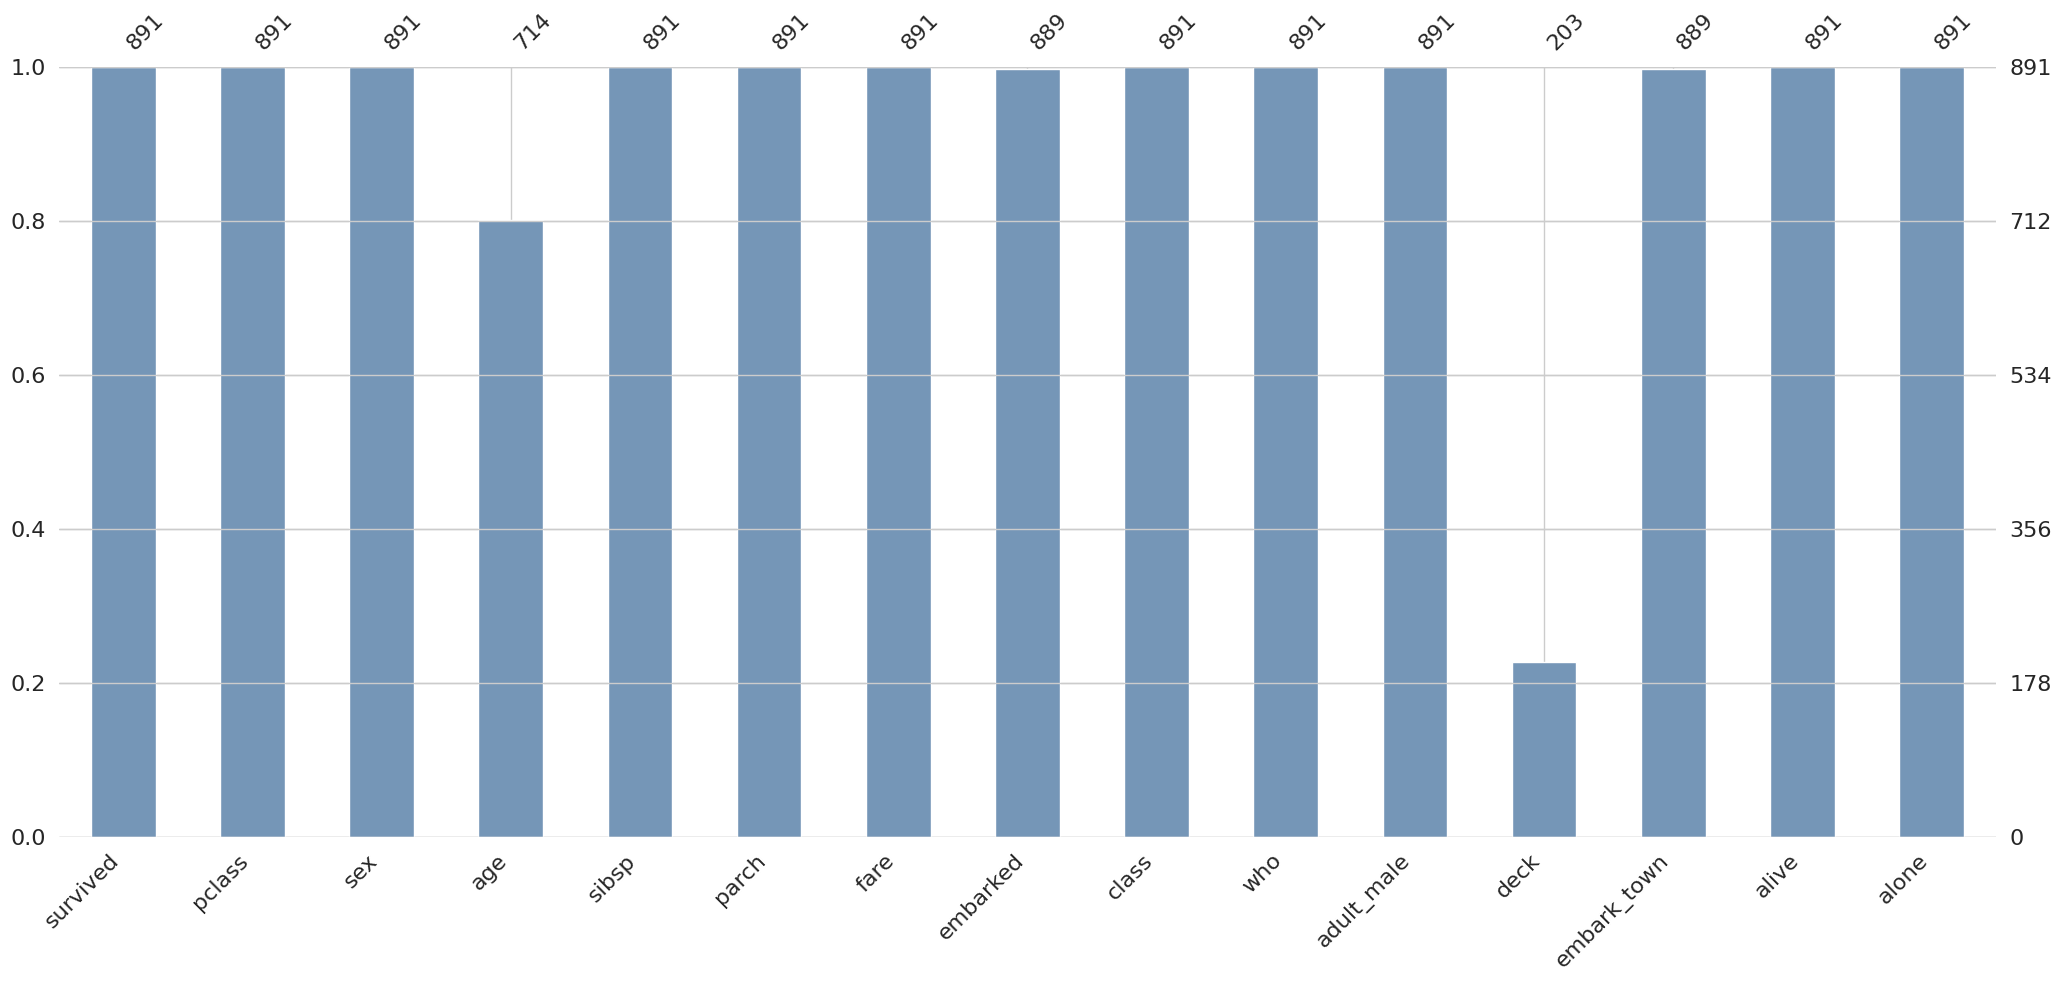

In [ ]:
# Visualize missing data using a bar chart
msno.bar(df, color= (115/250, 147/250, 179/250))

The bar chart provides a high-level overview of the percentage of missing values in each column.

**On the left side** of the plot, the y-axis scale ranges from 0.0 to 1.0, where
1.0 represents 100% data completeness. If the bar is less than this, it indicates that we have missing values within that column.

**On the right side** of the plot, the scale is measured in index values.

**Top right** represents the maximum number of rows within the dataframe.

**On the top** of the plot, there are a series of numbers that represent the
total count of the non-nullvalues within that column.

Columns with large portions of missing data, such as deck, are easily identifiable.The bar chart quantifies missing data, showing that **columns like deck have over 75% missing data, while other columns have far less.**

<Axes: >

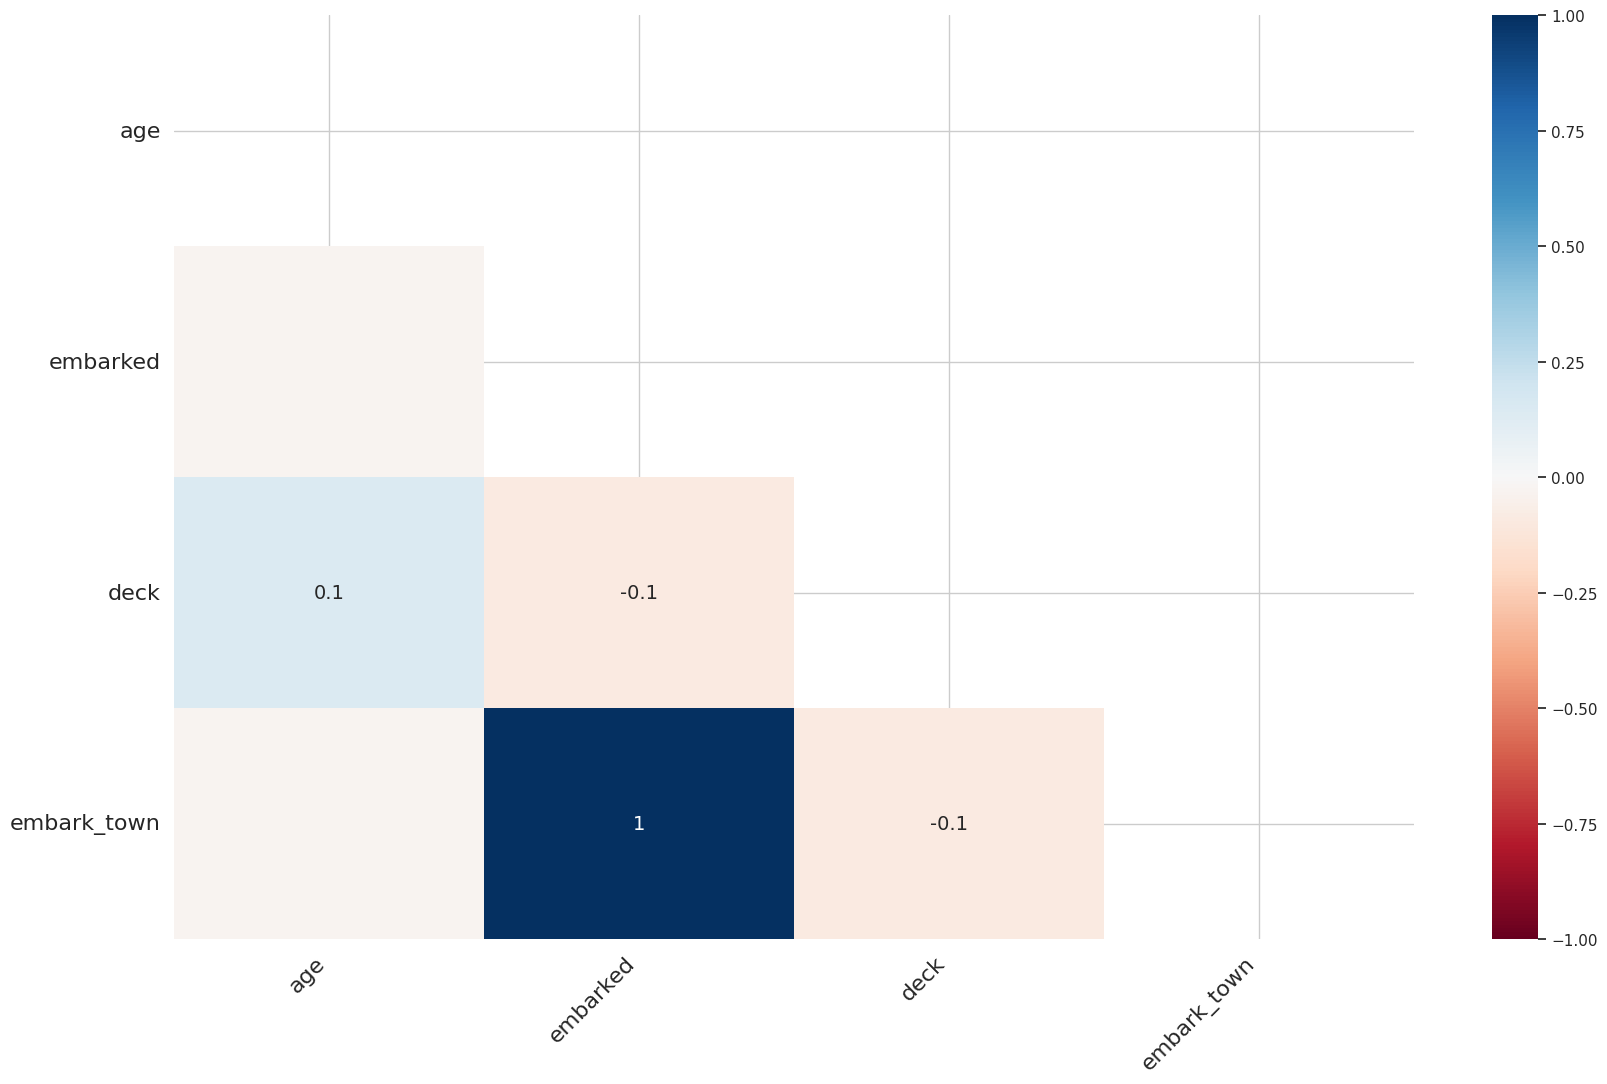

In [ ]:
# Visualize missing data correlation using a heatmap
msno.heatmap(df)

The heatmap is used to identify correlations of the nullity between each of the different columns. It can be used to identify if there is a relationship in the presence of null values between each of the columns. The heatmap approach is more suitable for smaller datasets.

Values close to +1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.

Values close to -1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column, i.e., when null values are present in one column, there are data values present in the other column, and vice versa.

Values close to 0, indicate there is little to no relationship between the presence of null valuesin one column compared to another.

Values less than -1, indicate that the correlation is very close to being 100% negative.

This heatmap helps you identify whether missing values in one column are related to missing values in another. Correlation between missing values could help with deciding on imputation strategies. If columns have a high correlation in missingness, imputation strategies can leverage this information.

**It is clear that there is no relation between the missingness in age and rest variables. The heatmap function shows that there are no strong correlations between missing values of different variables, except embarked and embark_town.
Thus, low correlations indicates that the data are MAR.**

<Axes: >

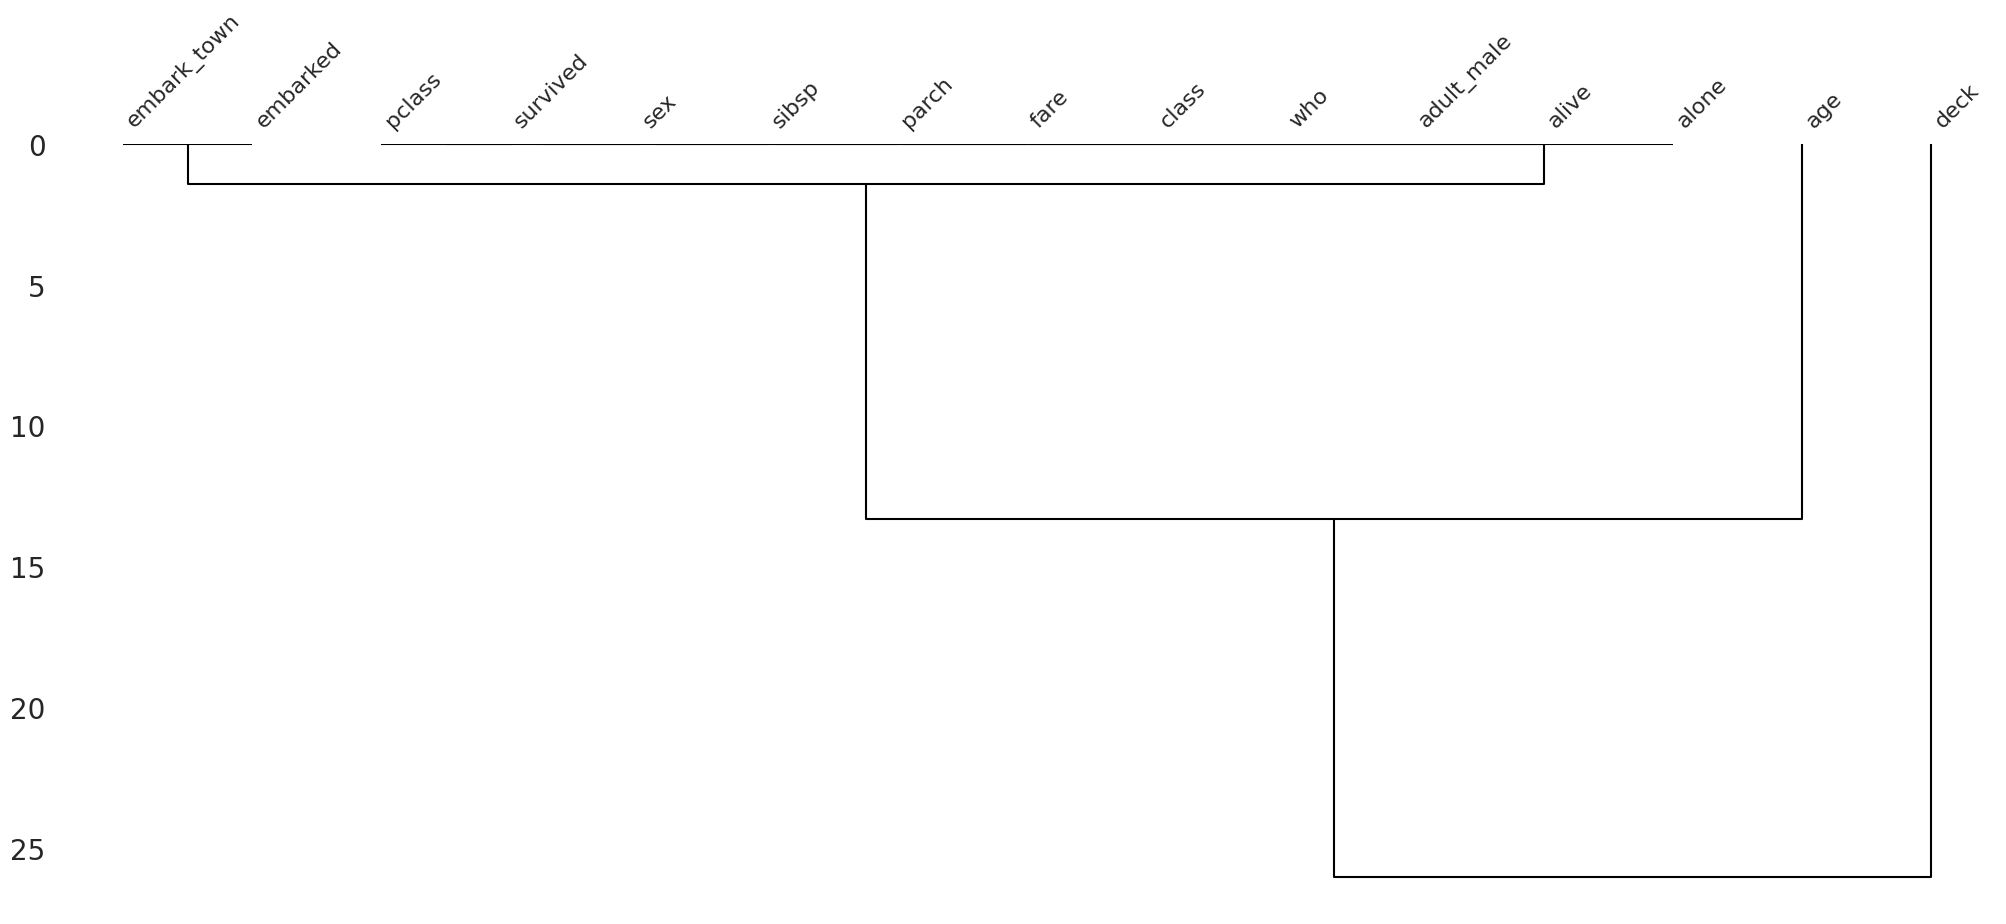

In [ ]:
# Visualize the hierarchical structure of missing data
msno.dendrogram(df)

The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.
If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns.

The more separated the columns in the tree, the less likely the null values can be correlated between the columns.

**Only embarked and embark_town show a close correlation. Age and deck null values are not correlated to any values in other columns.**

This can be useful for deciding how to handle imputation or feature removal in cases where groups of columns are highly correlated in terms of missing values.
